# **Notebook Workflow**
1. **Training Datasets Preprocessing: like discretization, mapping, feature selection and extraction**
  * Metabric
  * Duke
  * MSK
  * SEER


2. **Merging 3 datasets to fill missing value of there commons by Groupby method**


3. **Merging 3 preprocessed datasets to SEER dataset to make general standard dataset and use it for all approaches**

4. **Validation Dataset "Baheya" preprocessing:**
  * Extracting data of local, distant and normal.
  * Removing null values
  * Mapping standardized values


In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
metabric = pd.read_csv('/kaggle/input/breast-cancer-metabric/Breast Cancer METABRIC.csv')
msk = pd.read_csv('/kaggle/input/mskkkk/datasetmsk.csv')
duke = pd.read_csv('/kaggle/input/duukee/Clinical_and_Other_Features_Final.csv')

# METABRIC preprocessing

In [3]:

selected_columns_1 = metabric[[
                         'Inferred Menopausal State',
                         'Tumor Size',
                         'Lymph nodes examined positive',
                         'Neoplasm Histologic Grade',
                         'Pam50 + Claudin-low subtype',
                         'Cancer Type Detailed',
                         'ER Status',
                         'PR Status',
                         'HER2 Status',
                         'Chemotherapy',
                         'Radio Therapy',
                         'Type of Breast Surgery',
                         'Primary Tumor Laterality',
                         'Overall Survival (Months)',
                         'Relapse Free Status (Months)',
                         'Relapse Free Status',
                         'Age at Diagnosis'
    
                         ]]

# Select & Rename
selected_metabric = selected_columns_1.rename(columns={
    'Patient ID': 'Patient ID',
    'Inferred Menopausal State': 'Menopausal Status',
    'Tumor Size': 'Tumor Size',
    'Lymph nodes examined positive': 'Lymph Node Status',
    'Neoplasm Histologic Grade': 'Tumor Grade',
    'Pam50 + Claudin-low subtype': 'Mol Subtype',
    'Cancer Type Detailed': 'Histological Type',
    'ER Status': 'ER',
    'PR Status': 'PR',
    'HER2 Status': 'HER2',
    'Chemotherapy': 'Chemotherapy',
    'Radio Therapy': 'Radiotherapy',
    'Type of Breast Surgery': 'Type of Surgery',
    'Primary Tumor Laterality': 'Tumor Location',
    'Overall Survival (Months)': 'Overall Survival Status (Month)',
    'Relapse Free Status (Months)': 'Recurrence Free Status (Month)',
    'Relapse Free Status': 'Recurrence Free Status',
    'Age at Diagnosis': 'Age'
    })

In [4]:
selected_metabric.isna().sum()

Menopausal Status                  529
Tumor Size                         149
Lymph Node Status                  266
Tumor Grade                        121
Mol Subtype                        529
Histological Type                    0
ER                                  40
PR                                 529
HER2                               529
Chemotherapy                       529
Radiotherapy                       529
Type of Surgery                    554
Tumor Location                     639
Overall Survival Status (Month)    528
Recurrence Free Status (Month)     121
Recurrence Free Status              21
Age                                 11
dtype: int64

In [5]:
#Show unique values
categorical_columns = selected_metabric.select_dtypes(include='object').columns
unique_counts = {}

for column_name in categorical_columns:
    unique_counts[column_name] = selected_metabric[column_name].value_counts()

for column_name, counts in unique_counts.items():
    print(f"Unique values for '{column_name}':")
    print(counts)
    print()

Unique values for 'Menopausal Status':
Post    1556
Pre      424
Name: Menopausal Status, dtype: int64

Unique values for 'Mol Subtype':
LumA           700
LumB           475
Her2           224
claudin-low    218
Basal          209
Normal         148
NC               6
Name: Mol Subtype, dtype: int64

Unique values for 'Histological Type':
Breast Invasive Ductal Carcinoma             1865
Breast Mixed Ductal and Lobular Carcinoma     269
Breast Invasive Lobular Carcinoma             192
Invasive Breast Carcinoma                     133
Breast Invasive Mixed Mucinous Carcinoma       25
Breast                                         21
Metaplastic Breast Cancer                       2
Breast Angiosarcoma                             2
Name: Histological Type, dtype: int64

Unique values for 'ER':
Positive    1825
Negative     644
Name: ER, dtype: int64

Unique values for 'PR':
Positive    1040
Negative     940
Name: PR, dtype: int64

Unique values for 'HER2':
Negative    1733
Positive    

In [6]:
selected_metabric['Tumor Size'] = selected_metabric['Tumor Size'] / 10

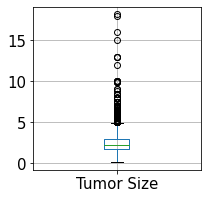

In [7]:
selected_metabric.boxplot(column = ['Tumor Size'], fontsize = 15, figsize=(3,3))

In [8]:
def update_tumor_size(value):
    if value <= 2:
        return 'T1'
    elif value > 2 and value <= 5:
        return 'T2'
    elif value > 5:
        return 'T3'


def update_lymph_node_status(value):
    if value == 0:
        return 'N0'
    elif value >= 1 and value <= 3:
        return 'N1'
    elif value >= 4 and value <= 9:
        return 'N2'
    elif value >= 10:
        return 'N3'


mapping_Mol = {
    'LumA': 'Luminal A',
    'LumB': 'Luminal B',
    'Her2': 'HER2 enriched'
}

mapping_Recurrence = {
    'Not Recurred': 'Not Recurrence',
    'Recurred': 'Recurrence'
}

mapping_TumorGrade = {
    1:'I',
    2:'II',
    3:'III'
}


bins = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
labels = [
    '25-29 years', '30-34 years', '35-39 years', '40-44 years', '45-49 years', 
    '50-54 years', '55-59 years', '60-64 years', '65-69 years', '70-74 years', 
    '75-79 years', '80-84 years', '85-89 years'
]

selected_metabric['Age'] = pd.cut(selected_metabric['Age'], bins=bins, labels=labels, right=False)
selected_metabric['Recurrence Free Status'] = selected_metabric['Recurrence Free Status'].map(mapping_Recurrence)
selected_metabric['Tumor Size'] = selected_metabric['Tumor Size'].apply(update_tumor_size)
selected_metabric['Lymph Node Status'] = selected_metabric['Lymph Node Status'].apply(update_lymph_node_status)
selected_metabric['Mol Subtype'] = selected_metabric['Mol Subtype'].map(mapping_Mol)
selected_metabric['Tumor Grade'] = selected_metabric['Tumor Grade'].map(mapping_TumorGrade)

In [9]:
selected_metabric.isna().sum()

Menopausal Status                   529
Tumor Size                          149
Lymph Node Status                   266
Tumor Grade                         121
Mol Subtype                        1110
Histological Type                     0
ER                                   40
PR                                  529
HER2                                529
Chemotherapy                        529
Radiotherapy                        529
Type of Surgery                     554
Tumor Location                      639
Overall Survival Status (Month)     528
Recurrence Free Status (Month)      121
Recurrence Free Status               21
Age                                  19
dtype: int64

In [10]:
# Fill missing values that are not common 
selected_metabric['Chemotherapy'] = selected_metabric.groupby(['Histological Type'])['Chemotherapy'].apply(lambda x: x.fillna(mode(x)[0][0]))
selected_metabric['Radiotherapy'] = selected_metabric.groupby(['Histological Type'])['Radiotherapy'].apply(lambda x: x.fillna(mode(x)[0][0]))
selected_metabric['Type of Surgery'] = selected_metabric.groupby(['Histological Type'])['Type of Surgery'].apply(lambda x: x.fillna(mode(x)[0][0]))
selected_metabric['Age'] = selected_metabric.groupby(['Histological Type'])['Age'].apply(lambda x: x.fillna(mode(x)[0][0]))

In [11]:
selected_metabric.isna().sum()

Menopausal Status                   529
Tumor Size                          149
Lymph Node Status                   266
Tumor Grade                         121
Mol Subtype                        1110
Histological Type                     0
ER                                   40
PR                                  529
HER2                                529
Chemotherapy                          0
Radiotherapy                          0
Type of Surgery                       0
Tumor Location                      639
Overall Survival Status (Month)     528
Recurrence Free Status (Month)      121
Recurrence Free Status               21
Age                                   0
dtype: int64

In [12]:
selected_metabric.shape

(2509, 17)

# Duke university preprocessing

In [13]:
selected_columns_2 = duke[[
    'Menopause (at diagnosis)',
    'Staging(Tumor Size)# [T]',
    'Staging(Nodes)#(Nx replaced by -1)[N]',
    'Nottingham grade',
    'Mol Subtype',
    'Histologic type',
    'ER',
    'PR',
    'HER2',
    'Chemo Therapy',
    'Radio Therapy',
    'Definitive Surgery Type',
    'Tumor Location',
    'Recurrence event(s)',
    'Days to local recurrence (from the date of diagnosis) ',
    'Days to distant recurrence(from the date of diagnosis) ',
    'Days to death (from the date of diagnosis) ',
    'Surgery'
  ]]

# Select & Rename
selected_duke = selected_columns_2.rename(columns={
    'Menopause (at diagnosis)': 'Menopausal Status',
    'Staging(Tumor Size)# [T]': 'Tumor Size',
    'Staging(Nodes)#(Nx replaced by -1)[N]': 'Lymph Node Status',
    'Nottingham grade': 'Tumor Grade',
    'Mol Subtype': 'Mol Subtype',
    'Histologic type': 'Histological Type',
    'ER': 'ER',
    'PR': 'PR',
    'HER2': 'HER2',
    'Chemo Therapy': 'Chemotherapy',
    'Radio Therapy': 'Radiotherapy',
    'Definitive Surgery Type': 'Type of Surgery',
    'Tumor Location': 'Tumor Location',
    'Recurrence event(s)': 'Recurrence Free Status',
    'Days to distant recurrence(from the date of diagnosis) ': 'distant_days',
    'Days to death (from the date of diagnosis) ': 'Overall Survival Status (Month)',
    'Days to local recurrence (from the date of diagnosis) ': 'local_days',
    'Surgery': 'Surgery'

})

In [14]:
# ashan ageb b3d kda recurrence months
selected_duke['local_in_month'] = selected_duke['local_days'].copy()
selected_duke['distant_in_month'] = selected_duke['distant_days'].copy()

In [15]:
selected_duke.isna().sum()

Menopausal Status                    0
Tumor Size                           6
Lymph Node Status                   24
Tumor Grade                        284
Mol Subtype                          0
Histological Type                  276
ER                                   0
PR                                   0
HER2                                 0
Chemotherapy                        44
Radiotherapy                         9
Type of Surgery                      7
Tumor Location                     271
Recurrence Free Status               2
local_days                           0
distant_days                         0
Overall Survival Status (Month)      0
Surgery                              7
local_in_month                       0
distant_in_month                     0
dtype: int64

In [16]:
mapping_MenopausalStatus = {
    0: 'Pre',
    1: 'Post',
    2: 'nan'
}

mapping_Recurrence = {
    0: 'Not Recurrence',
    1: 'Recurrence'
}

mapping_ER = {
    0: 'Negative',
    1: 'Positive'
}


mapping_PR = {
    0: 'Negative',
    1: 'Positive'
}


mapping_HER2 = {
    0: 'Negative',
    1: 'Positive',
    2: 'Borderline'
}


mapping_TunorLocation = {
    'L': 'Left',
    'R': 'Right'
}


mapping_Surgery = {
    '0': 'Breast Conserving',
    '1': 'Mastectomy'
}

mapping_HistologicalType = {
    0: 'DCIS',
    1: 'Breast Invasive Ductal Carcinoma',
    2: 'Breast Invasive Lobular Carcinoma',
    3: 'Metaplastic Breast Cancer',
    4: 'LCIS',
    5: 'tubular',
    6: 'Breast Mixed Ductal and Lobular Carcinoma',
    7: 'micropapillary',
    8: 'colloid',
    9: 'Breast Invasive Mixed Mucinous Carcinoma',
    10: 'medullary'
}

mapping_MolSubtype = {
    0: 'Luminal A',
    1: 'Luminal B',
    2: 'HER2 enriched',
    3: 'Triple Negative'
}

mapping_Chemo = {
    0: 'No',
    1: 'Yes'
}

mapping_Radio = {
    0: 'No',
    1: 'Yes'
}

mapping_TumorGrade = {
    1:'I',
    2:'II',
    3:'III'
}

mapping_sur = {
    0: 'No',
    1: 'Yes'
}


tumor_size_mapping = {
    1.0: 'T1',
    2.0: 'T2',
    3.0: 'T3',
    4.0: 'T4'
}

lymph_node_mapping = {
    0.0: 'N0',
    1.0: 'N1',
    2.0: 'N2',
    3.0: 'N3'
}


def map_loc(value):
    if value == 'NP':
        return 'No'
    else:
        return 'Local'

def map_DIS(value):
    if value == 'NP':
        return 'No'
    else:
        return 'Distant'

selected_duke['local_days'] = selected_duke['local_days'].map(map_loc)
selected_duke['distant_days'] = selected_duke['distant_days'].map(map_DIS)

selected_duke['Menopausal Status'] = selected_duke['Menopausal Status'].map(mapping_MenopausalStatus)
selected_duke['Recurrence Free Status'] = selected_duke['Recurrence Free Status'].map(mapping_Recurrence)
selected_duke['ER'] = selected_duke['ER'].map(mapping_ER)
selected_duke['PR'] = selected_duke['PR'].map(mapping_PR)
selected_duke['HER2'] = selected_duke['HER2'].map(mapping_HER2)
selected_duke['Tumor Location'] = selected_duke['Tumor Location'].map(mapping_TunorLocation)
selected_duke['Type of Surgery'] = selected_duke['Type of Surgery'].map(mapping_Surgery)
selected_duke['Histological Type'] = selected_duke['Histological Type'].map(mapping_HistologicalType)
selected_duke['Mol Subtype'] = selected_duke['Mol Subtype'].map(mapping_MolSubtype)
selected_duke['Chemotherapy'] = selected_duke['Chemotherapy'].map(mapping_Chemo)
selected_duke['Radiotherapy'] = selected_duke['Radiotherapy'].map(mapping_Radio)
selected_duke['Tumor Grade'] = selected_duke['Tumor Grade'].map(mapping_TumorGrade)
selected_duke['Surgery'] = selected_duke['Surgery'].map(mapping_sur)
selected_duke['Tumor Size'] = selected_duke['Tumor Size'].map(tumor_size_mapping)
selected_duke['Lymph Node Status'] = selected_duke['Lymph Node Status'].map(lymph_node_mapping)


In [17]:
def determine_new_column(row):
    if row['local_days'] == 'Local':
        return 'Local'
    elif row['distant_days'] == 'Distant':
        return 'Distant'
    else:
        return 'Normal'

selected_duke['Recurrence_Type'] = selected_duke.apply(determine_new_column, axis=1)

selected_duke.drop(columns=['local_days', 'distant_days'], inplace=True)

In [18]:
#Show unique values
categorical_columns = selected_duke.select_dtypes(include='object').columns
unique_counts = {}

for column_name in categorical_columns:
    unique_counts[column_name] = selected_duke[column_name].value_counts()

for column_name, counts in unique_counts.items():
    print(f"Unique values for '{column_name}':")
    print(counts)
    print()

Unique values for 'Menopausal Status':
Post    499
Pre     407
nan      16
Name: Menopausal Status, dtype: int64

Unique values for 'Tumor Size':
T1    409
T2    395
T3     90
T4     22
Name: Tumor Size, dtype: int64

Unique values for 'Lymph Node Status':
N0    529
N1    265
N2     61
N3     43
Name: Lymph Node Status, dtype: int64

Unique values for 'Tumor Grade':
II     318
III    207
I      113
Name: Tumor Grade, dtype: int64

Unique values for 'Mol Subtype':
Luminal A          595
Triple Negative    164
Luminal B          104
HER2 enriched       59
Name: Mol Subtype, dtype: int64

Unique values for 'Histological Type':
Breast Invasive Ductal Carcinoma            575
Breast Invasive Lobular Carcinoma            63
Breast Invasive Mixed Mucinous Carcinoma      4
tubular                                       2
Metaplastic Breast Cancer                     1
DCIS                                          1
Name: Histological Type, dtype: int64

Unique values for 'ER':
Positive    686
N

In [19]:
selected_duke.shape

(922, 19)

In [20]:
# merging local and distant months
def merge_columns(row):
    if row['distant_in_month'] != 'NP':
        return row['distant_in_month']
    elif row['local_in_month'] != 'NP':
        return row['local_in_month']
    else:
        return 'NP'

# Create new column Recurrence Free Status (Months) by merging distant and local columns
selected_duke['Recurrence Free Status (Month)'] = selected_duke.apply(merge_columns, axis=1)
selected_duke.drop(columns=['local_in_month', 'distant_in_month'], inplace=True)

In [21]:
# Replace 'NP' values with NaN in each column
selected_duke.replace('NP', np.nan, inplace=True)

In [22]:
# Convert days to months, keeping NaN values unchanged
selected_duke['Overall Survival Status (Month)'] = pd.to_numeric(selected_duke['Overall Survival Status (Month)'], errors='coerce')
selected_duke['Recurrence Free Status (Month)'] = pd.to_numeric(selected_duke['Recurrence Free Status (Month)'], errors='coerce')

average_days_in_month = 30.43675

selected_duke['Overall Survival Status (Month)'] = \
    selected_duke['Overall Survival Status (Month)'].apply(lambda x: x / average_days_in_month if not pd.isnull(x) else np.nan)

selected_duke['Recurrence Free Status (Month)'] = \
    selected_duke['Recurrence Free Status (Month)'].apply(lambda x: x / average_days_in_month if not pd.isnull(x) else np.nan)

In [23]:
# Count occurrences of NaN in each column
selected_duke.isnull().sum()

Menopausal Status                    0
Tumor Size                           6
Lymph Node Status                   24
Tumor Grade                        284
Mol Subtype                          0
Histological Type                  276
ER                                   0
PR                                   0
HER2                                 0
Chemotherapy                        44
Radiotherapy                         9
Type of Surgery                     43
Tumor Location                     271
Recurrence Free Status               2
Overall Survival Status (Month)    860
Surgery                              7
Recurrence_Type                      0
Recurrence Free Status (Month)     832
dtype: int64

In [24]:
selected_duke.dropna(subset=['Histological Type'], inplace=True)

In [25]:
selected_duke['Chemotherapy'] = selected_duke.groupby(['Histological Type'])['Chemotherapy'].apply(lambda x: x.fillna(mode(x)[0][0]))
selected_duke['Radiotherapy'] = selected_duke.groupby(['Histological Type'])['Radiotherapy'].apply(lambda x: x.fillna(mode(x)[0][0]))
selected_duke['Type of Surgery'] = selected_duke.groupby(['Histological Type'])['Type of Surgery'].apply(lambda x: x.fillna(mode(x)[0][0]))
selected_duke['Surgery'] = selected_duke.groupby(['Histological Type'])['Surgery'].apply(lambda x: x.fillna(mode(x)[0][0]))

In [26]:
selected_duke.isna().sum()

Menopausal Status                    0
Tumor Size                           2
Lymph Node Status                   18
Tumor Grade                          8
Mol Subtype                          0
Histological Type                    0
ER                                   0
PR                                   0
HER2                                 0
Chemotherapy                         0
Radiotherapy                         0
Type of Surgery                      0
Tumor Location                       0
Recurrence Free Status               0
Overall Survival Status (Month)    610
Surgery                              0
Recurrence_Type                      0
Recurrence Free Status (Month)     585
dtype: int64

# MSK university preprocessing

In [27]:
selected_columns_3 = msk[[ 'Menopausal Status At Diagnosis','Overall Survival (Months)', 'Disease Free (Months)','T Stage','N Stage',
           'Overall Primary Tumor Grade','Overall Patient Receptor Status', 'Cancer Type Detailed',
           'ER Status of the Primary', 'PR Status of the Primary', 'Overall Patient HER2 Status',
           'Primary Tumor Laterality' ,'Disease Free Event','Invasive Carcinoma Diagnosis Age']]


selected_msk = selected_columns_3.rename(columns={
    'Menopausal Status At Diagnosis': 'Menopausal Status',
    'T Stage': 'Tumor Size',
    'N Stage': 'Lymph Node Status',
    'Overall Primary Tumor Grade': 'Tumor Grade',
    'Overall Patient Receptor Status': 'Mol Subtype',
    'Cancer Type Detailed': 'Histological Type',
    'ER Status of the Primary': 'ER',
    'PR Status of the Primary': 'PR',
    'Overall Patient HER2 Status': 'HER2',
    'Primary Tumor Laterality': 'Tumor Location',
    'Overall Survival (Months)': 'Overall Survival Status (Month)',
    'Disease Free (Months)': 'Recurrence Free Status (Month)',
    'Disease Free Event' : 'Recurrence Free Status',
    'Invasive Carcinoma Diagnosis Age': 'Age'
    })

In [28]:
msk['Metastatic Disease at Last Follow-up'].value_counts()

Yes    1406
No      512
Name: Metastatic Disease at Last Follow-up, dtype: int64

In [29]:
msk['Prior Local Recurrence'].value_counts()

No     1829
Yes      89
Name: Prior Local Recurrence, dtype: int64

In [30]:
selected_msk['Recurrence Free Status'].value_counts()

1    1406
0     512
Name: Recurrence Free Status, dtype: int64

In [31]:
selected_msk['Recurrence_Type'] = msk['Metastatic Disease at Last Follow-up'] + msk['Prior Local Recurrence']

In [32]:
selected_msk.replace(['unk', 'Unknown', 'Unk/ND'], pd.NA, inplace=True)

Extracting locations

In [33]:
# select locations based on yes in metastasis column
selected_msk['Mets_loc'] = msk.apply(
    lambda row: row['Site of Sample'] if row['Metastatic Disease at Last Follow-up'] == 'Yes' else '', axis=1
)


In [34]:
dummies = pd.get_dummies(selected_msk['Mets_loc'])
filtered_dummies = dummies[['Liver', 'Lung', 'Bone', 'Brain']].reindex(columns=['Bone', 'Brain', 'Lung', 'Liver'], fill_value=0)

selected_msk = selected_msk.join(filtered_dummies)

selected_msk.drop(columns=['Mets_loc'], inplace=True)

In [35]:
# renaming them
selected_msk = selected_msk.rename(columns={'Brain': 'Brain_metastasis'})
selected_msk = selected_msk.rename(columns={'Bone': 'Bone_metastasis'})
selected_msk = selected_msk.rename(columns={'Lung': 'Lung_metastasis'})
selected_msk = selected_msk.rename(columns={'Liver': 'Liver_metastasis'})

In [36]:
selected_msk['Brain_metastasis'].value_counts()

0    1885
1      33
Name: Brain_metastasis, dtype: int64

In [37]:
selected_msk.head()

,Menopausal Status,Overall Survival Status (Month),Recurrence Free Status (Month),Tumor Size,Lymph Node Status,Tumor Grade,Mol Subtype,Histological Type,ER,PR,HER2,Tumor Location,Recurrence Free Status,Age,Recurrence_Type,Bone_metastasis,Brain_metastasis,Lung_metastasis,Liver_metastasis
0,Pre,31.5,1.1,T1c,N3a,II Intermediate Grade (Moderately Differentia...,HR+/HER2-,Breast Invasive Ductal Carcinoma,Positive,Positive,Negative,Left,1,37,YesNo,0,0,0,0
1,Pre,218.0,218.0,T2,N0,III High Grade (Poorly Differentiated),Triple Negative,Breast Invasive Ductal Carcinoma,Negative,Negative,Negative,Right,0,43,NoNo,0,0,0,0
2,Pre,98.0,68.9,T1b,N1mi,III High Grade (Poorly Differentiated),HR+/HER2-,Breast Invasive Ductal Carcinoma,Positive,Positive,Negative,Right,1,37,YesNo,0,0,0,1
3,Pre,123.1,90.2,T1b,N0,III High Grade (Poorly Differentiated),HR+/HER2+,Breast Invasive Ductal Carcinoma,Positive,Positive,Positive,Left,1,43,YesNo,0,0,0,0
4,Pre,63.6,0.5,TX,NX,II Intermediate Grade (Moderately Differentia...,HR+/HER2-,Breast Mixed Ductal and Lobular Carcinoma,Positive,Positive,Negative,Left,1,38,YesNo,0,0,0,0


In [38]:
#Show unique values
categorical_columns = selected_msk.select_dtypes(include='object').columns
unique_counts = {}

for column_name in categorical_columns:
    unique_counts[column_name] = selected_msk[column_name].value_counts()

for column_name, counts in unique_counts.items():
    print(f"Unique values for '{column_name}':")
    print(counts)
    print()

Unique values for 'Menopausal Status':
Post    894
Pre     888
Peri    114
Male     11
Name: Menopausal Status, dtype: int64

Unique values for 'Tumor Size':
T2      568
T1c     549
TX      260
T1b     185
T3      139
T4b      68
T1a      39
T4d      36
T4       15
T1mi     10
T4a       9
T4c       9
T0        7
T1        6
T1C       3
Tis       1
Name: Tumor Size, dtype: int64

Unique values for 'Lymph Node Status':
N0        782
N1a       330
NX        264
N2a       174
N3a       141
N1        102
N1mi       52
N0(i+)     17
N2         13
N3b        11
N3c        10
N2b         9
N3          3
N1c         2
N1b         1
Name: Lymph Node Status, dtype: int64

Unique values for 'Tumor Grade':
III High Grade (Poorly Differentiated)                1175
II  Intermediate Grade (Moderately Differentiated)     456
I  Low Grade (Well Differentiated)                      98
Name: Tumor Grade, dtype: int64

Unique values for 'Mol Subtype':
HR+/HER2-          1502
HR+/HER2+           178
Triple

In [39]:
histological_mapping = {
    'Breast Invasive Ductal Carcinoma': 'Breast Invasive Ductal Carcinoma',
    'Breast Invasive Lobular Carcinoma': 'Breast Invasive Lobular Carcinoma',
    'Breast Invasive Mixed Mucinous Carcinoma': 'Breast Invasive Mixed Mucinous Carcinoma',
    'Metaplastic Breast Cancer': 'Metaplastic Breast Cancer'
}

mapping_Recurrence = {
    0: 'Not Recurrence',
    1: 'Recurrence'
}

status_mapping = {
    'Peri': 'Pre',
    'Male': pd.NA
}


grade_mapping = {
    'III High Grade (Poorly Differentiated)': 'III',
    'II  Intermediate Grade (Moderately Differentiated)': 'II',
    'I  Low Grade (Well Differentiated)': 'I'
}

t_stage_mapping = {
    'TX': 'Tx',
    'T0': 'T0',
    'T1c': 'T1',
    'T1b': 'T1',
    'T1a': 'T1',
    'T1mic': 'T1',
    'T1NOS': 'T1',
    'T2': 'T2',
    'T3': 'T3',
    'T4b': 'T4',
    'T4d': 'T4',
    'T4a': 'T4',
    'T4c': 'T4',
    'T4NOS': 'T4'
}


n_stage_mapping = {
    'N0': 'N0',
    'N1a': 'N1',
    'NX': 'NX',
    'N2a': 'N2',
    'N3a': 'N3',
    'N1': 'N1',
    'N1mi': 'N1',
    'N0(i+)': 'N0',
    'N2': 'N2',
    'N3b': 'N3',
    'N3c': 'N3',
    'N2b': 'N2',
    'N3': 'N3',
    'N1c': 'N1',
    'N1b': 'N1'
}


location_mapping = {
    'Bilateral/Right': 'Right',
    'Bilateral/Left': 'Left'
}


subtype_mapping = {
    'HR+/HER2-': 'Luminal A',
    'Triple Negative': 'Triple Negative',
    'HR+/HER2+': 'Luminal B',
    'HR-/HER2+': 'HER2 enriched'

}

# Define the mapping
metastatic_mapping = {
    'YesNo': 'Distant',
    'NoNo': 'Normal',
    'YesYes': np.nan,  # Replace 'YesYes' with NaN
    'NoYes': 'Local'
}

bins = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
labels = [
    '25-29 years', '30-34 years', '35-39 years', '40-44 years', '45-49 years', 
    '50-54 years', '55-59 years', '60-64 years', '65-69 years', '70-74 years', 
    '75-79 years', '80-84 years', '85-89 years'
]

selected_msk['Age'] = pd.cut(selected_msk['Age'], bins=bins, labels=labels, right=False)
#selected_msk['Histological Type'] = selected_msk['Histological Type'].map(histological_mapping)
selected_msk['Mol Subtype'] = selected_msk['Mol Subtype'].map(subtype_mapping)
selected_msk['Recurrence_Type'] = selected_msk['Recurrence_Type'].replace(metastatic_mapping)
selected_msk['Tumor Location'] = selected_msk['Tumor Location'].replace(location_mapping)
selected_msk['Menopausal Status'] = selected_msk['Menopausal Status'].replace(status_mapping)
selected_msk['Tumor Grade'] = selected_msk['Tumor Grade'].map(grade_mapping)
selected_msk['Lymph Node Status'] = selected_msk['Lymph Node Status'].map(n_stage_mapping)
selected_msk = selected_msk[selected_msk['Lymph Node Status'] != 'NX']
selected_msk['Tumor Size'] = selected_msk['Tumor Size'].map(t_stage_mapping)
selected_msk = selected_msk[selected_msk['Tumor Size'] != 'Tx']
selected_msk['Recurrence Free Status'] = selected_msk['Recurrence Free Status'].map(mapping_Recurrence)

In [40]:
#Show unique values
categorical_columns = selected_msk.select_dtypes(include='object').columns
unique_counts = {}

for column_name in categorical_columns:
    unique_counts[column_name] = selected_msk[column_name].value_counts()

for column_name, counts in unique_counts.items():
    print(f"Unique values for '{column_name}':")
    print(counts)
    print()

Unique values for 'Menopausal Status':
Pre     836
Post    751
Name: Menopausal Status, dtype: int64

Unique values for 'Tumor Size':
T1    764
T2    568
T3    138
T4     77
T0      7
Name: Tumor Size, dtype: int64

Unique values for 'Lymph Node Status':
N0    774
N1    472
N2    187
N3    161
Name: Lymph Node Status, dtype: int64

Unique values for 'Tumor Grade':
III    996
II     366
I       92
Name: Tumor Grade, dtype: int64

Unique values for 'Mol Subtype':
Luminal A          1275
Triple Negative     150
Luminal B           133
HER2 enriched        43
Name: Mol Subtype, dtype: int64

Unique values for 'Histological Type':
Breast Invasive Ductal Carcinoma             1230
Breast Invasive Lobular Carcinoma             263
Breast Mixed Ductal and Lobular Carcinoma      71
Breast Invasive Cancer, NOS                    16
Metaplastic Breast Cancer                       9
Breast                                          6
Adenoid Cystic Breast Cancer                    2
Breast Invasive 

In [41]:
selected_msk.isnull().sum()

Menopausal Status                   14
Overall Survival Status (Month)      0
Recurrence Free Status (Month)       0
Tumor Size                          47
Lymph Node Status                    7
Tumor Grade                        147
Mol Subtype                          0
Histological Type                    0
ER                                  10
PR                                  20
HER2                                 0
Tumor Location                       2
Recurrence Free Status               0
Age                                  4
Recurrence_Type                     83
Bone_metastasis                      0
Brain_metastasis                     0
Lung_metastasis                      0
Liver_metastasis                     0
dtype: int64

In [42]:
selected_msk['Age'] = selected_msk.groupby(['Histological Type'])['Age'].apply(lambda x: x.fillna(mode(x)[0][0]))

In [43]:
selected_msk['Age'].isna().sum()

0

# **SEER Preprocessing**

In [44]:
seer = pd.read_csv('/kaggle/input/seeeer/SEER.csv')

In [45]:
seer['Summary stage 2000 (1998+)'].value_counts()

Localized           285052
Regional            126372
Distant              26181
Unknown/unstaged      9201
Name: Summary stage 2000 (1998+), dtype: int64

In [46]:
exclude_distant = [
    'Unknown/unstaged',
    'Regional'
]

exclude_age_ranges = ['01-04 years', '05-09 years', '10-14 years','15-19 years', '20-24 years', '75-79 years', '85+ years']

exclude_grade = ['Unknown', 'Undifferentiated; anaplastic; Grade IV']

exclude_laterality_values = [
    'Paired site, but no information concerning laterality',
    'Only one side - side unspecified',
    'Bilateral, single primary'
]

def map_Laterality(value):
    if value == 'Left - origin of primary':
        return 'Left'
    elif value == 'Right - origin of primary':
        return 'Right'


def map_Histologic_Type(value):
    if value == '8500/3: Infiltrating duct carcinoma, NOS':
        return 'Infiltrating duct carcinoma, NOS'

    elif value == '8520/3: Lobular carcinoma, NOS':
        return 'Lobular carcinoma, NOS'

    elif value == '8522/3: Infiltrating duct and lobular carcinoma':
        return 'Infiltrating duct and lobular carcinoma'

    elif value == '8523/3: Infiltrating duct mixed with other types of carcinoma':
        return 'Infiltrating duct mixed with other types of carcinoma'

    elif value == '8575/3: Metaplastic carcinoma, NOS':
        return 'Metaplastic carcinoma, NOS'

    elif value == '8480/3: Mucinous adenocarcinoma':
        return 'Mucinous adenocarcinoma'

    elif value == '8201/3: Cribriform carcinoma, NOS':
        return 'Cribriform carcinoma, NOS'

    else:
        return None

def update_T_stage(value):
    if value == 'TX':
        return 'Tx'
    elif value == 'T0':
        return 'T0'
    elif value == 'T1c' or value == 'T1b' or value == 'T1a' or value == 'T1mic' or value == 'T1NOS':
        return 'T1'
    elif value == 'T2':
        return 'T2'
    elif value == 'T3':
        return 'T3'
    elif value == 'T4b' or value == 'T4d' or value == 'T4a' or value == 'T4c' or value == 'T4NOS':
        return 'T4'


def update_N_stage(value):
    if value == 'N0' or value == 'N0(i-)' or value == 'N0(i+)' or value == 'N0(mol-)' or value == 'N0(mol+)':
        return 'N0'
    elif value == 'N1a' or value == 'N1' or value == 'N1mi'or value == 'N1NOS' or value == 'N1c' or value == 'N1b':
        return 'N1'
    elif value == 'N2a'or value == 'N2NOS' or value == 'N2b':
        return 'N2'
    elif value == 'N3a' or value == 'N3b' or value == 'N3c' or value == 'N3NOS':
        return 'N3'


def map_Surgery(value):
    if value == 0:
        return 'No'
    elif value > 0:
        return 'Yes'


def update_chemotherapy(value):
    if value == 'No/Unknown':
        return 'No'
    elif value == 'Yes':
        return 'Yes'


def map_Radiation(value):
    if value == 'Radiation after surgery' or value == 'Intraoperative radiation' or value == 'Radiation prior to surgery' or value == 'Intraoperative rad with other rad before/after surgery' or value == 'Radiation before and after surgery' or value == 'Sequence unknown, but both were given' or value == 'Surgery both before and after radiation':
        return 'Yes'
    elif value == 'No radiation and/or cancer-directed surgery':
        return 'No'


exclude_PR_values = [
    'Borderline',
    'Unknown'
]

exclude_Unknown = [
    'Unknown'
]

grade_mapping = {
    'Poorly differentiated; Grade III': 'III',
    'Moderately differentiated; Grade II': 'II',
    'Well differentiated; Grade I': 'I'
}

mapping_local = {
    'Localized': 'Local',
    'Distant': 'Distant'
}

mapping_MolSubtype = {
    'HR+/HER2- (Luminal A)': 'Luminal A',
    'HR+/HER2+ (Luminal B)': 'Luminal B',
    'HR-/HER2+ (HER2 enriched)': 'HER2 enriched',
    'HR-/HER2- (Triple Negative)': 'Triple Negative'
}



seer = seer[~seer['Summary stage 2000 (1998+)'].isin(exclude_distant)]
seer = seer.rename(columns={'Summary stage 2000 (1998+)': 'Recurrence_Type'})

seer = seer[~seer['Age recode with <1 year olds'].isin(exclude_age_ranges)]
seer = seer.rename(columns={'Age recode with <1 year olds': 'Age'})

seer = seer[~seer['Grade'].isin(exclude_grade)]
seer['Grade'] = seer['Grade'].map(grade_mapping)
seer = seer.rename(columns={'Grade': 'Tumor Grade'})

seer = seer[~seer['Laterality'].isin(exclude_laterality_values)]

seer['Laterality'] = seer['Laterality'].apply(map_Laterality)
seer = seer.rename(columns={'Laterality': 'Tumor Location'})

seer['ICD-O-3 Hist/behav, malignant'] = seer['ICD-O-3 Hist/behav, malignant'].apply(map_Histologic_Type)
seer = seer.rename(columns={'ICD-O-3 Hist/behav, malignant': 'Histological Type'})

seer['Derived AJCC T, 7th ed (2010-2015)'] = seer['Derived AJCC T, 7th ed (2010-2015)'].apply(update_T_stage)
seer = seer.rename(columns={'Derived AJCC T, 7th ed (2010-2015)': 'Tumor Size'})
seer = seer[seer['Tumor Size'] != 'Tx']


seer['Derived AJCC N, 7th ed (2010-2015)'] = seer['Derived AJCC N, 7th ed (2010-2015)'].apply(update_N_stage)
seer = seer.rename(columns={'Derived AJCC N, 7th ed (2010-2015)': 'Lymph Node Status'})

seer['RX Summ--Surg Prim Site (1998+)'] = seer['RX Summ--Surg Prim Site (1998+)'].apply(map_Surgery)
seer = seer.rename(columns={'RX Summ--Surg Prim Site (1998+)': 'Surgery'})

seer['Chemotherapy recode (yes, no/unk)'] = seer['Chemotherapy recode (yes, no/unk)'].apply(update_chemotherapy)
seer = seer.rename(columns={'Chemotherapy recode (yes, no/unk)': 'Chemotherapy'})

seer['Radiation sequence with surgery'] = seer['Radiation sequence with surgery'].apply(map_Radiation)
seer = seer.rename(columns={'Radiation sequence with surgery': 'Radiotherapy'})

seer = seer[~seer['ER Status Recode Breast Cancer (1990+)'].isin(exclude_PR_values)]
seer = seer.rename(columns={'ER Status Recode Breast Cancer (1990+)': 'ER'})

seer = seer[~seer['PR Status Recode Breast Cancer (1990+)'].isin(exclude_PR_values)]
seer = seer.rename(columns={'PR Status Recode Breast Cancer (1990+)': 'PR'})

seer = seer[seer['Breast Subtype (2010+)'] != 'Unknown']
seer = seer.rename(columns={'Breast Subtype (2010+)': 'Mol Subtype'})

seer = seer.rename(columns={'Derived HER2 Recode (2010+)': 'HER2'})

seer = seer[~seer['SEER Combined Mets at DX-bone (2010+)'].isin(exclude_Unknown)]
seer = seer.rename(columns={'SEER Combined Mets at DX-bone (2010+)': 'Bone_metastasis'})

seer = seer[~seer['SEER Combined Mets at DX-lung (2010+)'].isin(exclude_Unknown)]
seer = seer.rename(columns={'SEER Combined Mets at DX-lung (2010+)': 'Lung_metastasis'})

seer = seer[~seer['SEER Combined Mets at DX-liver (2010+)'].isin(exclude_Unknown)]
seer = seer.rename(columns={'SEER Combined Mets at DX-liver (2010+)': 'Liver_metastasis'})

seer = seer[~seer['SEER Combined Mets at DX-brain (2010+)'].isin(exclude_Unknown)]
seer = seer.rename(columns={'SEER Combined Mets at DX-brain (2010+)': 'Brain_metastasis'})

seer['Recurrence_Type'] = seer['Recurrence_Type'].map(mapping_local)

seer['Mol Subtype'] = seer['Mol Subtype'].map(mapping_MolSubtype)

seer['Survival months'] = pd.to_numeric(seer['Survival months'], errors='coerce').astype(float)
seer = seer.rename(columns={'Survival months': 'Overall Survival Status (Month)'})


In [47]:
selected_columns = [
    'Age',
    'Tumor Location',
    'Tumor Grade',
    'Tumor Size',
    'Lymph Node Status',
    'Surgery',
    'Chemotherapy',
    'Radiotherapy',
    'Bone_metastasis',
    'Brain_metastasis',
    'Lung_metastasis',
    'Liver_metastasis',
    'Mol Subtype',
    'ER',
    'PR',
    'HER2',
    'Histological Type',
    'Overall Survival Status (Month)',
    'Recurrence_Type'

]

selected_seer = seer[selected_columns]

In [48]:
selected_seer['Recurrence_Type'].value_counts()

Local      217307
Distant     13417
Name: Recurrence_Type, dtype: int64

In [49]:
selected_seer.isna().sum()

Age                                    0
Tumor Location                         0
Tumor Grade                            0
Tumor Size                         36469
Lymph Node Status                  37363
Surgery                                0
Chemotherapy                           0
Radiotherapy                           0
Bone_metastasis                        3
Brain_metastasis                       4
Lung_metastasis                        2
Liver_metastasis                       2
Mol Subtype                            0
ER                                     0
PR                                     0
HER2                                   0
Histological Type                   8588
Overall Survival Status (Month)        0
Recurrence_Type                        0
dtype: int64

In [50]:
selected_seer = selected_seer.dropna()

In [51]:
selected_seer.isna().sum()

Age                                0
Tumor Location                     0
Tumor Grade                        0
Tumor Size                         0
Lymph Node Status                  0
Surgery                            0
Chemotherapy                       0
Radiotherapy                       0
Bone_metastasis                    0
Brain_metastasis                   0
Lung_metastasis                    0
Liver_metastasis                   0
Mol Subtype                        0
ER                                 0
PR                                 0
HER2                               0
Histological Type                  0
Overall Survival Status (Month)    0
Recurrence_Type                    0
dtype: int64

# **Merging METABRIC, Duke & MSK to fill missing of common:**

In [52]:
df_merged = pd.concat([selected_metabric, selected_duke, selected_msk], axis=0, join='outer')

In [53]:
df_merged.shape

(4756, 23)

In [54]:
df_merged.columns

Index(['Menopausal Status', 'Tumor Size', 'Lymph Node Status', 'Tumor Grade',
       'Mol Subtype', 'Histological Type', 'ER', 'PR', 'HER2', 'Chemotherapy',
       'Radiotherapy', 'Type of Surgery', 'Tumor Location',
       'Overall Survival Status (Month)', 'Recurrence Free Status (Month)',
       'Recurrence Free Status', 'Age', 'Surgery', 'Recurrence_Type',
       'Bone_metastasis', 'Brain_metastasis', 'Lung_metastasis',
       'Liver_metastasis'],
      dtype='object')

In [55]:
df_merged.dtypes

Menopausal Status                   object
Tumor Size                          object
Lymph Node Status                   object
Tumor Grade                         object
Mol Subtype                         object
Histological Type                   object
ER                                  object
PR                                  object
HER2                                object
Chemotherapy                        object
Radiotherapy                        object
Type of Surgery                     object
Tumor Location                      object
Overall Survival Status (Month)    float64
Recurrence Free Status (Month)     float64
Recurrence Free Status              object
Age                                 object
Surgery                             object
Recurrence_Type                     object
Bone_metastasis                    float64
Brain_metastasis                   float64
Lung_metastasis                    float64
Liver_metastasis                   float64
dtype: obje

In [56]:
#Show unique values
categorical_columns = df_merged.select_dtypes(include='object').columns
unique_counts = {}

for column_name in categorical_columns:
    unique_counts[column_name] = df_merged[column_name].value_counts()

for column_name, counts in unique_counts.items():
    print(f"Unique values for '{column_name}':")
    print(counts)
    print()

Unique values for 'Menopausal Status':
Post    2646
Pre     1553
nan       14
Name: Menopausal Status, dtype: int64

Unique values for 'Tumor Size':
T1    2085
T2    2048
T3     321
T4      97
T0       7
Name: Tumor Size, dtype: int64

Unique values for 'Lymph Node Status':
N0    2345
N1    1355
N2     458
N3     307
Name: Lymph Node Status, dtype: int64

Unique values for 'Tumor Grade':
III    2401
II     1660
I       419
Name: Tumor Grade, dtype: int64

Unique values for 'Mol Subtype':
Luminal A          2389
Luminal B           685
HER2 enriched       304
Triple Negative     268
Name: Mol Subtype, dtype: int64

Unique values for 'Histological Type':
Breast Invasive Ductal Carcinoma             3670
Breast Invasive Lobular Carcinoma             518
Breast Mixed Ductal and Lobular Carcinoma     340
Invasive Breast Carcinoma                     135
Breast Invasive Mixed Mucinous Carcinoma       31
Breast                                         27
Breast Invasive Cancer, NOS            

In [57]:
histological_mapping = {
    'Breast Invasive Ductal Carcinoma': 'Infiltrating duct carcinoma',
    'Breast Invasive Lobular Carcinoma': 'Lobular carcinoma',
    'Breast Mixed Ductal and Lobular Carcinoma': 'Infiltrating duct and lobular carcinoma',
    'Breast Invasive Mixed Mucinous Carcinoma': 'Infiltrating duct and lobular carcinoma',
    'Invasive Breast Carcinoma': 'Invasive Breast Carcinoma',
    'Metaplastic Breast Cancer': 'Metaplastic carcinoma'
}
df_merged['Histological Type'] = df_merged['Histological Type'].map(histological_mapping)

In [58]:
df_merged = df_merged[df_merged['Tumor Size'] != 'T0']
df_merged = df_merged[df_merged['Chemotherapy'] != 0]

In [59]:
df_merged.isna().sum()

Menopausal Status                   543
Tumor Size                          198
Lymph Node Status                   290
Tumor Grade                         271
Mol Subtype                        1110
Histological Type                    46
ER                                   48
PR                                  547
HER2                                529
Chemotherapy                       1594
Radiotherapy                       1594
Type of Surgery                    1594
Tumor Location                      639
Overall Survival Status (Month)    1137
Recurrence Free Status (Month)      705
Recurrence Free Status               21
Age                                 645
Surgery                            4103
Recurrence_Type                    2591
Bone_metastasis                    3154
Brain_metastasis                   3154
Lung_metastasis                    3154
Liver_metastasis                   3154
dtype: int64

In [60]:
df_merged.to_csv('impute_merged.csv', index=False)

In [61]:
df_merged= pd.read_csv('/kaggle/working/impute_merged.csv')

In [62]:
# Drop missing in Histological Type 3shan bnmla beh
df_merged.dropna(subset=['Histological Type','Recurrence Free Status'], inplace=True)

In [63]:
# Fill missing values in metabric

df_merged['Recurrence Free Status (Month)'] = df_merged.groupby(['Histological Type', 'Recurrence Free Status'])['Recurrence Free Status (Month)'].apply(lambda x: x.fillna(x.mean()))
df_merged['Overall Survival Status (Month)'] = df_merged.groupby(['Histological Type'])['Overall Survival Status (Month)'].apply(lambda x: x.fillna(x.mean()))

df_merged['Mol Subtype'] = df_merged.groupby(['Histological Type'])['Mol Subtype'].apply(lambda x: x.fillna(mode(x)[0][0]))
df_merged['Tumor Size'] = df_merged.groupby(['Histological Type'])['Tumor Size'].apply(lambda x: x.fillna(mode(x)[0][0]))
df_merged['Lymph Node Status'] = df_merged.groupby(['Histological Type'])['Lymph Node Status'].apply(lambda x: x.fillna(mode(x)[0][0]))
df_merged['Tumor Grade'] = df_merged.groupby(['Histological Type'])['Tumor Grade'].apply(lambda x: x.fillna(mode(x)[0][0]))

df_merged['Menopausal Status'] = df_merged.groupby(['Histological Type'])['Menopausal Status'].apply(lambda x: x.fillna(mode(x)[0][0]))
df_merged['HER2'] = df_merged.groupby(['Histological Type'])['HER2'].apply(lambda x: x.fillna(mode(x)[0][0]))
df_merged['ER'] = df_merged.groupby(['Histological Type'])['ER'].apply(lambda x: x.fillna(mode(x)[0][0]))
df_merged['PR'] = df_merged.groupby(['Histological Type'])['PR'].apply(lambda x: x.fillna(mode(x)[0][0]))

df_merged['Tumor Location'] = df_merged.groupby(['Histological Type'])['Tumor Location'].apply(lambda x: x.fillna(mode(x)[0][0]))


In [64]:
df_merged.isna().sum()

Menopausal Status                     0
Tumor Size                            0
Lymph Node Status                     0
Tumor Grade                           0
Mol Subtype                           0
Histological Type                     0
ER                                    0
PR                                    0
HER2                                  0
Chemotherapy                       1573
Radiotherapy                       1573
Type of Surgery                    1573
Tumor Location                        0
Overall Survival Status (Month)       0
Recurrence Free Status (Month)        0
Recurrence Free Status                0
Age                                 643
Surgery                            4038
Recurrence_Type                    2545
Bone_metastasis                    3108
Brain_metastasis                   3108
Lung_metastasis                    3108
Liver_metastasis                   3108
dtype: int64

# **Merging all for general dataset: SEER, METABRIC, Duke & MSK**

In [65]:
merged_all = pd.concat([df_merged, selected_seer], axis=0, join='outer')

In [66]:
merged_all.shape

(190800, 23)

In [67]:
loc_mapping = {
    'No': 'No',
    'Yes': 'Yes',
    0.0: 'No',
    1.0: 'Yes'
}

histological_mapping = {
    'Infiltrating duct carcinoma, NOS': 'Infiltrating duct carcinoma',
    'Lobular carcinoma, NOS': 'Lobular carcinoma',
    'Infiltrating duct and lobular carcinoma': 'Infiltrating duct and lobular carcinoma',
    'Infiltrating duct mixed with other types of carcinoma': 'Infiltrating duct and lobular carcinoma',
    'Mucinous adenocarcinoma': 'Mucinous adenocarcinoma',
    'Infiltrating duct carcinoma': 'Infiltrating duct carcinoma',
    'Metaplastic carcinoma, NOS': 'Metaplastic carcinoma',
    'Lobular carcinoma': 'Lobular carcinoma',
    'Cribriform carcinoma, NOS': 'Cribriform carcinoma',
    'Invasive Breast Carcinoma': 'Invasive Breast Carcinoma'
}

merged_all['Histological Type'] = merged_all['Histological Type'].map(histological_mapping)

merged_all['Bone_metastasis'] = merged_all['Bone_metastasis'].map(loc_mapping)
merged_all['Brain_metastasis'] = merged_all['Brain_metastasis'].map(loc_mapping)
merged_all['Lung_metastasis'] = merged_all['Lung_metastasis'].map(loc_mapping)
merged_all['Liver_metastasis'] = merged_all['Liver_metastasis'].map(loc_mapping)

In [68]:
#Show unique values
categorical_columns = merged_all.select_dtypes(include='object').columns
unique_counts = {}

for column_name in categorical_columns:
    unique_counts[column_name] = merged_all[column_name].value_counts()

for column_name, counts in unique_counts.items():
    print(f"Unique values for '{column_name}':")
    print(counts)
    print()

Unique values for 'Menopausal Status':
Post    3142
Pre     1539
Name: Menopausal Status, dtype: int64

Unique values for 'Tumor Size':
T1    135113
T2     46122
T3      6237
T4      3318
T0        10
Name: Tumor Size, dtype: int64

Unique values for 'Lymph Node Status':
N0    180813
N1      5815
N3      2432
N2      1740
Name: Lymph Node Status, dtype: int64

Unique values for 'Tumor Grade':
II     84604
III    55667
I      50529
Name: Tumor Grade, dtype: int64

Unique values for 'Mol Subtype':
Luminal A          143895
Triple Negative     20623
Luminal B           18909
HER2 enriched        7373
Name: Mol Subtype, dtype: int64

Unique values for 'Histological Type':
Infiltrating duct carcinoma                150746
Infiltrating duct and lobular carcinoma     17568
Lobular carcinoma                           16962
Mucinous adenocarcinoma                      4168
Metaplastic carcinoma                         820
Cribriform carcinoma                          402
Invasive Breast Carcino

In [69]:
merged_all.isna().sum()

Menopausal Status                  186119
Tumor Size                              0
Lymph Node Status                       0
Tumor Grade                             0
Mol Subtype                             0
Histological Type                      12
ER                                      0
PR                                      0
HER2                                    0
Chemotherapy                         1573
Radiotherapy                         1573
Type of Surgery                    187692
Tumor Location                          0
Overall Survival Status (Month)         0
Recurrence Free Status (Month)     186119
Recurrence Free Status             186119
Age                                   643
Surgery                              4038
Recurrence_Type                      2545
Bone_metastasis                      3108
Brain_metastasis                     3108
Lung_metastasis                      3108
Liver_metastasis                     3108
dtype: int64

In [70]:
merged_all.dropna(subset=['Histological Type'], inplace=True)

In [71]:
merged_all.shape

(190788, 23)

In [72]:
merged_all.to_csv('Final_general_merged.csv', index=False)

# **Baheya data preprocessing**
recurrence (local & distant datasets)

**1. Local dataset preprocessing**

In [73]:
baheya = pd.read_excel('/kaggle/input/local-baheya/Local.xlsx')

In [74]:
selected_baheya = baheya[['Menopausal state','T at Presentation','N','Molecular.subtype',
           'Grade','Tumor Type from specimen ','ER', 'PR', 'HER2','Biopsy Laterality','Local/Distant (updated)','Diseasefree.survival.DURAION2','survival.duration']]


In [75]:
selected_baheya.shape

(219, 13)

In [76]:
selected_baheya.columns

Index(['Menopausal state', 'T at Presentation', 'N', 'Molecular.subtype',
       'Grade', 'Tumor Type from specimen ', 'ER', 'PR', 'HER2',
       'Biopsy Laterality', 'Local/Distant (updated)',
       'Diseasefree.survival.DURAION2', 'survival.duration'],
      dtype='object')

In [77]:
#Show unique values
categorical_columns = selected_baheya.select_dtypes(include='object').columns
unique_counts = {}

for column_name in categorical_columns:
    unique_counts[column_name] = selected_baheya[column_name].value_counts()

for column_name, counts in unique_counts.items():
    print(f"Unique values for '{column_name}':")
    print(counts)
    print()

Unique values for 'Menopausal state':
Post-M        109
Pre-M         100
Unrecorded      9
Name: Menopausal state, dtype: int64

Unique values for 'T at Presentation':
T2      63
T4      55
T3      37
T1      27
Tis      7
Tx       4
High     1
Name: T at Presentation, dtype: int64

Unique values for 'N':
N1    65
N0    61
N3    28
N2    26
Nx     9
Name: N, dtype: int64

Unique values for 'Molecular.subtype':
Luminal A    135
TNBC          51
HER2+         13
Luminal B      6
Name: Molecular.subtype, dtype: int64

Unique values for 'Grade':
2               107
3                64
1                 6
High              5
Intermediate      4
low               1
high              1
Name: Grade, dtype: int64

Unique values for 'Tumor Type from specimen ':
Invasive duct carcinoma (NST)                                                  135
Invasive Lobular carcinoma NOS                                                  14
Ductal carcinoma in situ, DCIS                                         

In [78]:
def update_tumor_size(value):
    if value == 'Tis':
        return None
    elif value == 'T1':
        return 'T1'
    elif value == 'T2':
        return 'T2'
    elif value == 'T3':
        return 'T3'
    elif value == 'T4':
        return 'T4'
    elif value == 'Tx':
        return None
    elif value == 'High':
        return 'T4'
    else:
        return None

def update_Grade(value):
    if value == 'High' or value == 'high' or value == 3:
        return 'III'
    elif value == 'Intermediate' or value == 2:
        return 'II'
    elif value == 'low' or value == 1:
        return 'I'
    else:
        return None

def update_PR(value):
    if value == 'Nrgative' or value == 'Negative':
        return 'Negative'
    elif value == 'Positive':
        return 'Positive'
    else:
        return None

mapping = {
    'Luminal A': 'Luminal A',
    'TNBC': 'Triple Negative',
    'HER2+': 'HER2 enriched',
    'Luminal B': 'Luminal B'
}

dis_mapping = {
    'Local': 'Local',
    'Local&Distant': 'Distant',
    'Local & Distant': 'Distant',
    'local': 'Local',
    'local &Distant': 'Distant',
    'Local&distant': 'Distant',
    'local&distant': 'Distant'
}

# Define the mapping dictionary
HIS_mapping = {
    'Invasive duct carcinoma (NST)': 'Infiltrating duct carcinoma',
    'Invasive Lobular carcinoma NOS': 'Lobular carcinoma',
    #'Mixed Tumor': 'Infiltrating duct and lobular carcinoma',
    'Invasive breast carcinoma, NST': 'Invasive Breast Carcinoma',
    'Invasive duct carcinoma': 'Infiltrating duct carcinoma',
    'Mixed invasive duct and lobular carcinoma': 'Infiltrating duct and lobular carcinoma',
    #'Cribriform carcinoma NOS': 'Cribriform carcinoma',
    #'Mucinous adenocarcinoma': 'Mucinous adenocarcinoma',
    'DUCT LOBULAR CARCINOMA': 'Infiltrating duct and lobular carcinoma',  # Assuming they are equivalent
    'Mixed invasive duct carcinoma grade II with lobular differentiation': 'Infiltrating duct and lobular carcinoma',
    'invasive duct carcinoma': 'Infiltrating duct carcinoma',  # Assuming they are equivalent
    #'invasive tubular/cribriform carcinoma': 'Infiltrating duct carcinoma',  # Assuming they are equivalent
    #'Invasive cribriform carcinoma': 'Cribriform carcinoma',
    'MixedDutal and lobular': 'Infiltrating duct and lobular carcinoma'  # Assuming it's a typo for 'Mixed Ductal and lobular'
}




meno_mapping = {
    'Post-M': 'Post',
    'Pre-M': 'Pre'
}

selected_baheya['T at Presentation'] = selected_baheya['T at Presentation'].apply(update_tumor_size)
selected_baheya = selected_baheya.rename(columns={'T at Presentation': 'Tumor Size'})
selected_baheya = selected_baheya[selected_baheya['Tumor Size'] != 'Tx']


selected_baheya['Grade'] = selected_baheya['Grade'].apply(update_Grade)
selected_baheya = selected_baheya.rename(columns={'Grade': 'Tumor Grade'})

selected_baheya['PR'] = selected_baheya['PR'].replace('Unrecorded', np.nan)
selected_baheya['PR'] = selected_baheya['PR'].apply(update_PR)

selected_baheya = selected_baheya.rename(columns={'Biopsy Laterality': 'Tumor Location'})

selected_baheya['HER2'] = selected_baheya['HER2'].replace('Unrecorded', np.nan)
selected_baheya['Menopausal state'] = selected_baheya['Menopausal state'].replace('Unrecorded', np.nan)

selected_baheya['Menopausal state'] = selected_baheya['Menopausal state'].map(meno_mapping)
selected_baheya = selected_baheya.rename(columns={'Menopausal state': 'Menopausal Status'})

selected_baheya['Molecular.subtype'] = selected_baheya['Molecular.subtype'].map(mapping)
selected_baheya = selected_baheya.rename(columns={'Molecular.subtype': 'Mol Subtype'})

selected_baheya = selected_baheya[selected_baheya['N'] != 'Nx']
selected_baheya = selected_baheya.rename(columns={'N': 'Lymph Node Status'})

selected_baheya['Local/Distant (updated)'] = selected_baheya['Local/Distant (updated)'].map(dis_mapping)
selected_baheya = selected_baheya.rename(columns={'Local/Distant (updated)': 'Recurrence_Type'})

selected_baheya['Tumor Type from specimen '] = selected_baheya['Tumor Type from specimen '].map(HIS_mapping)
selected_baheya = selected_baheya.rename(columns={'Tumor Type from specimen ': 'Histological Type'})

selected_baheya = selected_baheya.rename(columns={'survival.duration': 'Overall Survival Status (Month)'})
selected_baheya = selected_baheya.rename(columns={'Diseasefree.survival.DURAION2': 'Recurrence Free Status (Month)'})


In [79]:
selected_baheya.isna().sum()

Menopausal Status                  10
Tumor Size                         34
Lymph Node Status                  30
Mol Subtype                        13
Tumor Grade                        29
Histological Type                  53
ER                                  6
PR                                 10
HER2                               13
Tumor Location                     13
Recurrence_Type                     1
Recurrence Free Status (Month)     14
Overall Survival Status (Month)    15
dtype: int64

In [80]:
selected_baheya = selected_baheya.dropna()

In [81]:
selected_baheya.isna().sum()

Menopausal Status                  0
Tumor Size                         0
Lymph Node Status                  0
Mol Subtype                        0
Tumor Grade                        0
Histological Type                  0
ER                                 0
PR                                 0
HER2                               0
Tumor Location                     0
Recurrence_Type                    0
Recurrence Free Status (Month)     0
Overall Survival Status (Month)    0
dtype: int64

In [82]:
selected_baheya.shape

(125, 13)

In [83]:
#Show unique values
categorical_columns = selected_baheya.select_dtypes(include='object').columns
unique_counts = {}

for column_name in categorical_columns:
    unique_counts[column_name] = selected_baheya[column_name].value_counts()

for column_name, counts in unique_counts.items():
    print(f"Unique values for '{column_name}':")
    print(counts)
    print()

Unique values for 'Menopausal Status':
Post    66
Pre     59
Name: Menopausal Status, dtype: int64

Unique values for 'Tumor Size':
T2    41
T4    41
T3    25
T1    18
Name: Tumor Size, dtype: int64

Unique values for 'Lymph Node Status':
N1    47
N0    39
N3    20
N2    19
Name: Lymph Node Status, dtype: int64

Unique values for 'Mol Subtype':
Luminal A          82
Triple Negative    31
HER2 enriched       9
Luminal B           3
Name: Mol Subtype, dtype: int64

Unique values for 'Tumor Grade':
II     74
III    47
I       4
Name: Tumor Grade, dtype: int64

Unique values for 'Histological Type':
Infiltrating duct carcinoma                108
Lobular carcinoma                           10
Invasive Breast Carcinoma                    4
Infiltrating duct and lobular carcinoma      3
Name: Histological Type, dtype: int64

Unique values for 'ER':
Positive    85
Negative    40
Name: ER, dtype: int64

Unique values for 'PR':
Positive    91
Negative    34
Name: PR, dtype: int64

Unique values 

In [84]:
selected_baheya = selected_baheya[selected_baheya['Recurrence_Type'] != 'Distant']

**2. Distant data preprocessing**

In [85]:
dis_baheya = pd.read_csv('/kaggle/input/baheya-distanttt/NU_Distant_Recurrence.csv')

In [86]:
dis_baheya = dis_baheya[(dis_baheya['M.at.Presentation'] != 'M1') & (dis_baheya['M.at.Presentation'] != 'Mx')]

In [87]:
columns_to_drop = ['(LVI)Peritumoural lymphovascular invasion.x', 'Other.1','LNs','Contralateral','Date.of.Recurrence','Immunotherapy','Hormonal',
       'Adjuvant.TTT..Yes.No.', 'Date.of.Surgery','First.Regimen.Type','Site.1','M.at.Presentation', 'Family_History','HTN', 'DM','NO','First_BMI','KI67....','status'
]  # List of columns to drop
dis_baheya.drop(columns_to_drop, axis=1, inplace=True)

In [88]:
dis_baheya.columns

Index(['Age', 'Menopausal.state', 'T.at.Presentation', 'N.at.Presentation',
       'Biopsy.Laterality', 'Grade', 'Tumor_Type', 'ER', 'PR', 'HER2',
       'Molecular subtype', 'Surgery', 'Chemotherapy', 'RTH',
       'Type.of.Recurrence', 'Liver', 'Lung', 'Bone', 'Brain', 'DFs', 'OS'],
      dtype='object')

In [89]:
# Fill NA values in the specified subset of columns with 'No'
subset_columns = ['Liver', 'Lung', 'Bone', 'Brain']
dis_baheya[subset_columns] = dis_baheya[subset_columns].fillna('No')

In [90]:
#Show unique values
categorical_columns = dis_baheya.select_dtypes(include='object').columns
unique_counts = {}

for column_name in categorical_columns:
    unique_counts[column_name] = dis_baheya[column_name].value_counts()

for column_name, counts in unique_counts.items():
    print(f"Unique values for '{column_name}':")
    print(counts)
    print()

Unique values for 'Menopausal.state':
Pre-M         249
Post-M        219
Unrecorded      6
pre-M           1
Name: Menopausal.state, dtype: int64

Unique values for 'T.at.Presentation':
T4     156
T2     146
T3      88
T1      42
Tis      4
Tx       3
Name: T.at.Presentation, dtype: int64

Unique values for 'N.at.Presentation':
N1    188
N0     88
N2     84
N3     76
Nx      2
Name: N.at.Presentation, dtype: int64

Unique values for 'Biopsy.Laterality':
Right    235
Left     235
Name: Biopsy.Laterality, dtype: int64

Unique values for 'Grade':
2               325
3                93
1                16
Intermediate      5
High              4
Low               1
Name: Grade, dtype: int64

Unique values for 'Tumor_Type':
Invasive duct carcinoma (NST)                                   336
Mixed Tumor                                                      40
Invasive Lobular carcinoma NOS                                   35
Mixed invasive duct and lobular carcinoma                        1

In [91]:
dis_baheya.isna().sum()

Age                   32
Menopausal.state       8
T.at.Presentation     44
N.at.Presentation     45
Biopsy.Laterality     13
Grade                 39
Tumor_Type            21
ER                     7
PR                    13
HER2                  10
Molecular subtype     15
Surgery               15
Chemotherapy          69
RTH                   64
Type.of.Recurrence     0
Liver                  0
Lung                   0
Bone                   0
Brain                  0
DFs                   26
OS                    32
dtype: int64

In [92]:
def update_Grade(value):
    if value == 'High' or value == 'high' or value == '3':
        return 'III'
    elif value == 'Intermediate' or value == '2':
        return 'II'
    elif value == 'Low' or value == '1':
        return 'I'
    else:
        return None
    
ms_mapping = {
    'Lumina A': 'Luminal A',
    'Lumin A': 'Luminal A',
    'Lumina B': 'Luminal B',
    'Lumin B':'Luminal B',
    'TNBC': 'Triple Negative',
    'HER2+': 'HER2 enriched'
}


HIS_mapping = {
    'Invasive duct carcinoma (NST)': 'Infiltrating duct carcinoma',
    'Invasive breast carcinoma, NST': 'Invasive Breast Carcinoma', 
    'Invasive Lobular carcinoma NOS': 'Lobular carcinoma',
    'Mixed invasive duct and lobular carcinoma': 'Infiltrating duct and lobular carcinoma',
}
meno_mapping = {
    'Post-M': 'Post',
    'Pre-M': 'Pre'
}

bins = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
labels = [
    '25-29 years', '30-34 years', '35-39 years', '40-44 years', '45-49 years', 
    '50-54 years', '55-59 years', '60-64 years', '65-69 years', '70-74 years', 
    '75-79 years', '80-84 years', '85-89 years'
]

dis_baheya['Age'] = pd.cut(dis_baheya['Age'], bins=bins, labels=labels, right=False)

dis_baheya = dis_baheya.rename(columns={'Biopsy.Laterality': 'Tumor Location'})
dis_baheya = dis_baheya.rename(columns={'RTH': 'Radiotherapy'})

dis_baheya['Menopausal.state'] = dis_baheya['Menopausal.state'].map(meno_mapping)
dis_baheya = dis_baheya.rename(columns={'Menopausal.state': 'Menopausal Status'})

dis_baheya = dis_baheya[(dis_baheya['N.at.Presentation'] != 'Nx') ]
dis_baheya.rename(columns={'N.at.Presentation': 'Lymph Node Status'}, inplace=True)

dis_baheya = dis_baheya[(dis_baheya['T.at.Presentation'] != 'Tx') & (dis_baheya['T.at.Presentation'] != 'Tis') ]
dis_baheya.rename(columns={'T.at.Presentation': 'Tumor Size'}, inplace=True)

dis_baheya['Molecular subtype'] = dis_baheya['Molecular subtype'].replace(ms_mapping)
dis_baheya.rename(columns={'Molecular subtype': 'Mol Subtype'}, inplace=True)

dis_baheya['Grade'] = dis_baheya['Grade'].apply(update_Grade)
dis_baheya = dis_baheya.rename(columns={'Grade': 'Tumor Grade'})

dis_baheya = dis_baheya.rename(columns={'Type.of.Recurrence': 'Recurrence_Type'})

dis_baheya['Tumor_Type'] = dis_baheya['Tumor_Type'].map(HIS_mapping)
dis_baheya = dis_baheya.rename(columns={'Tumor_Type': 'Histological Type'})

dis_baheya = dis_baheya[(dis_baheya['ER'] != 'Unrecorded') & (dis_baheya['PR'] != 'Unrecorded') & (dis_baheya['HER2'] != 'Unrecorded') & (dis_baheya['Menopausal Status'] != 'Unrecorded') ]

dis_baheya = dis_baheya.rename(columns={'DFs': 'Recurrence Free Status (Month)'})
dis_baheya = dis_baheya.rename(columns={'OS': 'Overall Survival Status (Month)'})

# Rename the columns
dis_baheya.rename(columns={"Liver": "Liver_metastasis",
                   "Lung": "Lung_metastasis",
                   "Bone": "Bone_metastasis",
                   "Brain": "Brain_metastasis"}, inplace=True)

In [93]:
dis_baheya.isna().sum()

Age                                31
Menopausal Status                  14
Tumor Size                         43
Lymph Node Status                  44
Tumor Location                     12
Tumor Grade                        36
Histological Type                  83
ER                                  7
PR                                 12
HER2                                9
Mol Subtype                        10
Surgery                            15
Chemotherapy                       68
Radiotherapy                       61
Recurrence_Type                     0
Liver_metastasis                    0
Lung_metastasis                     0
Bone_metastasis                     0
Brain_metastasis                    0
Recurrence Free Status (Month)     25
Overall Survival Status (Month)    30
dtype: int64

In [94]:
dis_baheya = dis_baheya.dropna()

In [95]:
dis_baheya.shape

(254, 21)

In [96]:
#Show unique values
categorical_columns = dis_baheya.select_dtypes(include='object').columns
unique_counts = {}

for column_name in categorical_columns:
    unique_counts[column_name] = dis_baheya[column_name].value_counts()

for column_name, counts in unique_counts.items():
    print(f"Unique values for '{column_name}':")
    print(counts)
    print()

Unique values for 'Menopausal Status':
Pre     136
Post    118
Name: Menopausal Status, dtype: int64

Unique values for 'Tumor Size':
T4    98
T2    91
T3    49
T1    16
Name: Tumor Size, dtype: int64

Unique values for 'Lymph Node Status':
N1    116
N2     50
N0     44
N3     44
Name: Lymph Node Status, dtype: int64

Unique values for 'Tumor Location':
Left     131
Right    123
Name: Tumor Location, dtype: int64

Unique values for 'Tumor Grade':
II     191
III     55
I        8
Name: Tumor Grade, dtype: int64

Unique values for 'Histological Type':
Infiltrating duct carcinoma                215
Lobular carcinoma                           21
Infiltrating duct and lobular carcinoma     12
Invasive Breast Carcinoma                    6
Name: Histological Type, dtype: int64

Unique values for 'ER':
Positive    202
Negative     52
Name: ER, dtype: int64

Unique values for 'PR':
Positive    218
Negative     36
Name: PR, dtype: int64

Unique values for 'HER2':
Negative    238
Positive     16

In [97]:
dis_baheya.to_csv('Distant_baheya.csv', index=False)

**3. Normal dataset preprocessing**

In [98]:
nor_baheya = pd.read_csv('/kaggle/input/normal-baheya/Normal.csv')

In [99]:
selected_nor_baheya = nor_baheya[['Age','Menopause_status','T at Presentation','N','Biopsy Laterality',
           'Tumor Type from specimen','Grade','ER', 'PR', 'HER2','Molecularsubtypes','DFs_2024','os_update2024']]


In [100]:
selected_nor_baheya.shape

(259, 13)

In [101]:
selected_nor_baheya.columns

Index(['Age', 'Menopause_status', 'T at Presentation', 'N',
       'Biopsy Laterality', 'Tumor Type from specimen', 'Grade', 'ER', 'PR',
       'HER2', 'Molecularsubtypes', 'DFs_2024', 'os_update2024'],
      dtype='object')

In [102]:
#Show unique values
categorical_columns = selected_nor_baheya.select_dtypes(include='object').columns
unique_counts = {}

for column_name in categorical_columns:
    unique_counts[column_name] = selected_nor_baheya[column_name].value_counts()

for column_name, counts in unique_counts.items():
    print(f"Unique values for '{column_name}':")
    print(counts)
    print()

Unique values for 'Menopause_status':
Post-M    163
Pre_M      96
Name: Menopause_status, dtype: int64

Unique values for 'T at Presentation':
T2     140
T1      41
T3      38
T4      37
Tis      3
Name: T at Presentation, dtype: int64

Unique values for 'N':
N0    113
N1     96
N2     35
N3     12
Nx      2
Name: N, dtype: int64

Unique values for 'Biopsy Laterality':
Left     130
Right    129
Name: Biopsy Laterality, dtype: int64

Unique values for 'Tumor Type from specimen':
Invasive duct carcinoma (NST)                  192
Mixed invasive duct and lobular carcinoma       15
Invasive Lobular carcinoma NOS                  13
Cribriform carcinoma NOS                         8
Invasive tubular/cribriform carcinoma            8
Ductal carcinoma in situ, DCIS                   8
Mucinous adenocarcinoma                          6
Invasive breast carcinoma, NST                   3
Metaplastic carcinoma NOS                        2
Mixed Tumor (Other)                              2
Tubular

In [103]:
selected_nor_baheya.isna().sum()

Age                          0
Menopause_status             0
T at Presentation            0
N                            1
Biopsy Laterality            0
Tumor Type from specimen     0
Grade                        0
ER                           2
PR                          13
HER2                         6
Molecularsubtypes            7
DFs_2024                    87
os_update2024                0
dtype: int64

In [104]:
def update_tumor_size(value):
    if value == 'Tis':
        return None
    elif value == 'T1':
        return 'T1'
    elif value == 'T2':
        return 'T2'
    elif value == 'T3':
        return 'T3'
    elif value == 'T4':
        return 'T4'
    elif value == 'Tx':
        return None
    elif value == 'High':
        return 'T4'
    else:
        return None

def update_Grade(value):
    if value == 'High' or value == 'high' or value == '3':
        return 'III'
    elif value == 'Intermediate' or value == '2':
        return 'II'
    elif value == 'Low' or value == '1':
        return 'I'
    else:
        return None

mapping = {
    'Lumina A': 'Luminal A',
    'TNBC': 'Triple Negative',
    'HER2+': 'HER2 enriched',
    'Lumina B': 'Luminal B'
}


HIS_mapping = {
    'Invasive duct carcinoma (NST)': 'Infiltrating duct carcinoma',
    'Invasive Lobular carcinoma NOS': 'Lobular carcinoma',
    'Invasive breast carcinoma, NST': 'Invasive Breast Carcinoma',
    'Mixed invasive duct and lobular carcinoma': 'Infiltrating duct and lobular carcinoma',
}



meno_mapping = {
    'Post-M': 'Post',
    'Pre_M': 'Pre'
}

bins = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
labels = [
    '25-29 years', '30-34 years', '35-39 years', '40-44 years', '45-49 years', 
    '50-54 years', '55-59 years', '60-64 years', '65-69 years', '70-74 years', 
    '75-79 years', '80-84 years', '85-89 years'
]

selected_nor_baheya['Age'] = pd.cut(selected_nor_baheya['Age'], bins=bins, labels=labels, right=False)

selected_nor_baheya['T at Presentation'] = selected_nor_baheya['T at Presentation'].apply(update_tumor_size)
selected_nor_baheya = selected_nor_baheya.rename(columns={'T at Presentation': 'Tumor Size'})
selected_nor_baheya = selected_nor_baheya[selected_nor_baheya['Tumor Size'] != 'Tx']

selected_nor_baheya['Grade'] = selected_nor_baheya['Grade'].apply(update_Grade)
selected_nor_baheya = selected_nor_baheya.rename(columns={'Grade': 'Tumor Grade'})

selected_nor_baheya = selected_nor_baheya.rename(columns={'Biopsy Laterality': 'Tumor Location'})

selected_nor_baheya['Menopause_status'] = selected_nor_baheya['Menopause_status'].map(meno_mapping)
selected_nor_baheya = selected_nor_baheya.rename(columns={'Menopause_status': 'Menopausal Status'})

selected_nor_baheya['Molecularsubtypes'] = selected_nor_baheya['Molecularsubtypes'].map(mapping)
selected_nor_baheya = selected_nor_baheya.rename(columns={'Molecularsubtypes': 'Mol Subtype'})

selected_nor_baheya = selected_nor_baheya[selected_nor_baheya['N'] != 'Nx']
selected_nor_baheya = selected_nor_baheya.rename(columns={'N': 'Lymph Node Status'})

selected_nor_baheya['Tumor Type from specimen'] = selected_nor_baheya['Tumor Type from specimen'].map(HIS_mapping)
selected_nor_baheya = selected_nor_baheya.rename(columns={'Tumor Type from specimen': 'Histological Type'})

selected_nor_baheya = selected_nor_baheya.rename(columns={'os_update2024': 'Overall Survival Status (Month)'})
selected_nor_baheya = selected_nor_baheya.rename(columns={'DFs_2024': 'Recurrence Free Status (Month)'})

selected_nor_baheya['Recurrence_Type'] = 'Normal'

In [105]:
selected_nor_baheya.isna().sum()

Age                                 0
Menopausal Status                   0
Tumor Size                          3
Lymph Node Status                   1
Tumor Location                      0
Histological Type                  36
Tumor Grade                         0
ER                                  2
PR                                 13
HER2                                6
Mol Subtype                         7
Recurrence Free Status (Month)     87
Overall Survival Status (Month)     0
Recurrence_Type                     0
dtype: int64

In [106]:
selected_nor_baheya = selected_nor_baheya.dropna()

In [107]:
selected_nor_baheya.isna().sum()

Age                                0
Menopausal Status                  0
Tumor Size                         0
Lymph Node Status                  0
Tumor Location                     0
Histological Type                  0
Tumor Grade                        0
ER                                 0
PR                                 0
HER2                               0
Mol Subtype                        0
Recurrence Free Status (Month)     0
Overall Survival Status (Month)    0
Recurrence_Type                    0
dtype: int64

In [108]:
#Show unique values
categorical_columns = selected_nor_baheya.select_dtypes(include='object').columns
unique_counts = {}

for column_name in categorical_columns:
    unique_counts[column_name] = selected_nor_baheya[column_name].value_counts()

for column_name, counts in unique_counts.items():
    print(f"Unique values for '{column_name}':")
    print(counts)
    print()

Unique values for 'Menopausal Status':
Post    93
Pre     59
Name: Menopausal Status, dtype: int64

Unique values for 'Tumor Size':
T2    88
T3    26
T4    24
T1    14
Name: Tumor Size, dtype: int64

Unique values for 'Lymph Node Status':
N0    65
N1    56
N2    23
N3     8
Name: Lymph Node Status, dtype: int64

Unique values for 'Tumor Location':
Right    83
Left     69
Name: Tumor Location, dtype: int64

Unique values for 'Histological Type':
Infiltrating duct carcinoma                139
Lobular carcinoma                            8
Infiltrating duct and lobular carcinoma      5
Name: Histological Type, dtype: int64

Unique values for 'Tumor Grade':
II     126
III     25
I        1
Name: Tumor Grade, dtype: int64

Unique values for 'ER':
Positive    122
Negative     30
Name: ER, dtype: int64

Unique values for 'PR':
Positive    113
Negative     39
Name: PR, dtype: int64

Unique values for 'HER2':
Negative    122
Positive     30
Name: HER2, dtype: int64

Unique values for 'Mol Subty

In [109]:
selected_nor_baheya.shape

(152, 14)

# **Merging Baheya Datasets**

In [110]:
# Concatenate the datasets along the rows and keep only common columns
common_columns = selected_nor_baheya.columns.intersection(dis_baheya.columns).intersection(selected_baheya.columns)
baheya_merged = pd.concat([selected_nor_baheya[common_columns], dis_baheya[common_columns], selected_baheya[common_columns]], axis=0, ignore_index=True)

In [111]:
baheya_merged.shape

(455, 13)

In [112]:
baheya_merged.head()

,Menopausal Status,Tumor Size,Lymph Node Status,Tumor Location,Histological Type,Tumor Grade,ER,PR,HER2,Mol Subtype,Recurrence Free Status (Month),Overall Survival Status (Month),Recurrence_Type
0,Post,T3,N1,Right,Infiltrating duct carcinoma,II,Positive,Positive,Negative,Luminal A,27.0,32.0,Normal
1,Post,T2,N1,Left,Infiltrating duct carcinoma,II,Negative,Negative,Positive,HER2 enriched,99.0,99.0,Normal
2,Post,T2,N2,Left,Infiltrating duct carcinoma,II,Positive,Positive,Negative,Luminal A,97.0,97.0,Normal
3,Pre,T4,N2,Right,Infiltrating duct carcinoma,II,Positive,Positive,Negative,Luminal A,95.0,96.0,Normal
4,Post,T4,N2,Right,Infiltrating duct carcinoma,II,Positive,Positive,Negative,Luminal A,83.0,88.0,Normal


In [113]:
baheya_merged['Recurrence Free Status'] = baheya_merged['Recurrence_Type'].copy()

In [114]:
rec_mapping = {
    'Local': 'Recurrence',
    'Distant': 'Recurrence',
    'Normal': 'Not Recurrence'
}

baheya_merged['Recurrence Free Status'] = baheya_merged['Recurrence Free Status'].map(rec_mapping)

In [115]:
#Show unique values
categorical_columns = baheya_merged.select_dtypes(include='object').columns
unique_counts = {}

for column_name in categorical_columns:
    unique_counts[column_name] = baheya_merged[column_name].value_counts()

for column_name, counts in unique_counts.items():
    print(f"Unique values for '{column_name}':")
    print(counts)
    print()

Unique values for 'Menopausal Status':
Post    234
Pre     221
Name: Menopausal Status, dtype: int64

Unique values for 'Tumor Size':
T2    196
T4    135
T3     86
T1     38
Name: Tumor Size, dtype: int64

Unique values for 'Lymph Node Status':
N1    190
N0    129
N2     79
N3     57
Name: Lymph Node Status, dtype: int64

Unique values for 'Tumor Location':
Right    230
Left     225
Name: Tumor Location, dtype: int64

Unique values for 'Histological Type':
Infiltrating duct carcinoma                399
Lobular carcinoma                           31
Infiltrating duct and lobular carcinoma     18
Invasive Breast Carcinoma                    7
Name: Histological Type, dtype: int64

Unique values for 'Tumor Grade':
II     345
III    100
I       10
Name: Tumor Grade, dtype: int64

Unique values for 'ER':
Positive    358
Negative     97
Name: ER, dtype: int64

Unique values for 'PR':
Positive    366
Negative     89
Name: PR, dtype: int64

Unique values for 'HER2':
Negative    403
Positive   

In [116]:
baheya_merged.to_csv('Final_Baheya_Merged.csv', index=False)